{'direct': False, 'energy': 0.4952999999999994, 'transition': '\\Gamma-X'}


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

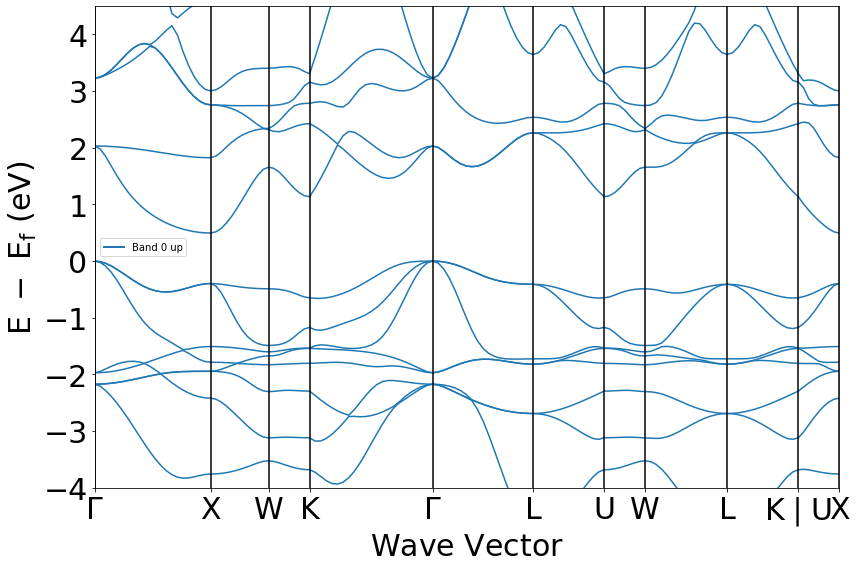

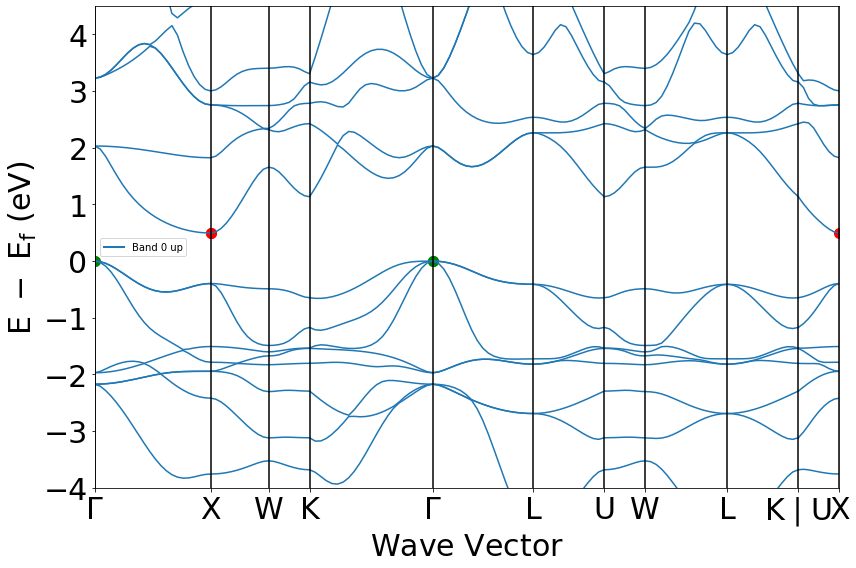

In [98]:
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
from IPython.display import Markdown, display
with MPRester("ittkwe9m4QMvQT1m") as m:


    # Structure for material id
    structure = m.get_structure_by_material_id("mp-924129")
    
structure_band = m.get_bandstructure_by_material_id("mp-924129")
gap_band= structure_band.get_band_gap()
print(gap_band)
plotter = BSPlotter(structure_band)
plotter.get_plot()
plotter.get_plot(vbm_cbm_marker = True)

# Dircetion bande de valence et de conduction

[(0.0, 0.0), (2.9712175037137163, 0.0), (2.9712175037137163, 0.0)]
[(1.0195606602332095, 0.4952999999999994), (1.0195606602332095, 0.4952999999999994), (6.544761139232032, 0.4952999999999994)]


Text(0.5, 1.0, 'Structure des bandes éléctronique; mise en évidence bande interdite')

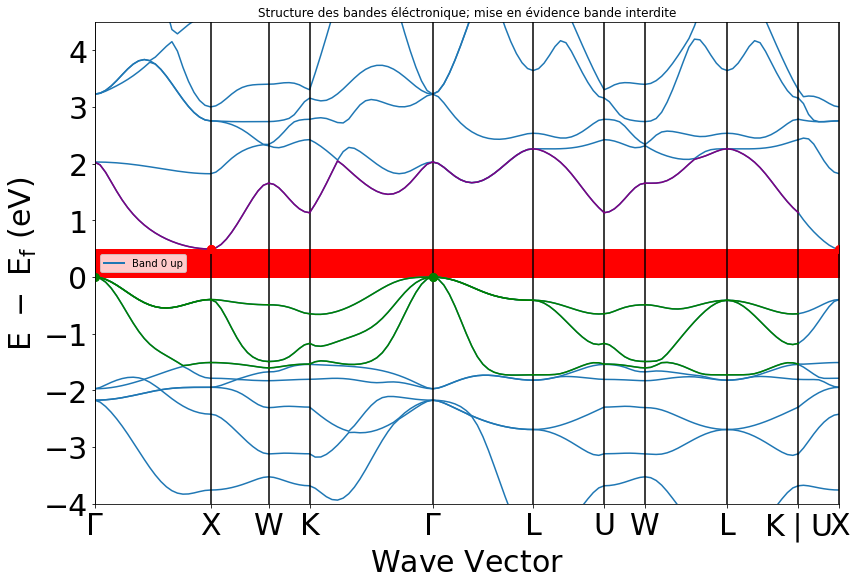

In [99]:
data = plotter.bs_plot_data()
distance = data.get('ticks').get('distance')
distances = data.get('distances')
energy = data.get('energy')
plotter.get_plot()
#On va mettre en vert la bande de valence
#On va mettre en bleu la bande de conduction
for i in range(9):
    plt.plot(distances[i],energy.get('1')[i][18],'green')
    plt.plot(distances[i],energy.get('1')[i][19],'green')
    plt.plot(distances[i],energy.get('1')[i][20],'green')
    plt.plot(distances[i],energy.get('1')[i][21],'purple')
    
    
#On prends les coordonées de la bande de valence  
bv_coord = data.get('vbm')
print(vbm_coord) # Coordonnées des maxima de la bande de valence
for i in range(len(bv_coord)):
    (x,y) = bv_coord[i]
    plt.plot(x, y, 'og', markersize = 8)
    
#On prends les coordonées de la bande de conduction    
bc_coord = data.get('cbm')
print(bc_coord)
for i in range(len(bc_coord)):
    (x,y) = cbm_coord[i]
    plt.plot(x, y, 'or', markersize = 8)

# Maintenant qu'on peut indiquer la bande de valence maximale et la bande de conduction minimale
#On va faire le lien entre ces deux-ci et la bande interdite
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, gap_band.get('energy'), color = "red")

plt.title('Structure des bandes éléctronique; mise en évidence bande interdite')

La bande de valence max est : [(0.0, 0.0), (2.9712175037137163, 0.0), (2.9712175037137163, 0.0)]
La bande de conduction min est : [(1.0195606602332095, 0.4952999999999994), (1.0195606602332095, 0.4952999999999994), (6.544761139232032, 0.4952999999999994)]


Text(0.5, 1.0, 'Direction dans laquelle la bande de valence (conduction) présente le plus et le moins de dispersion')

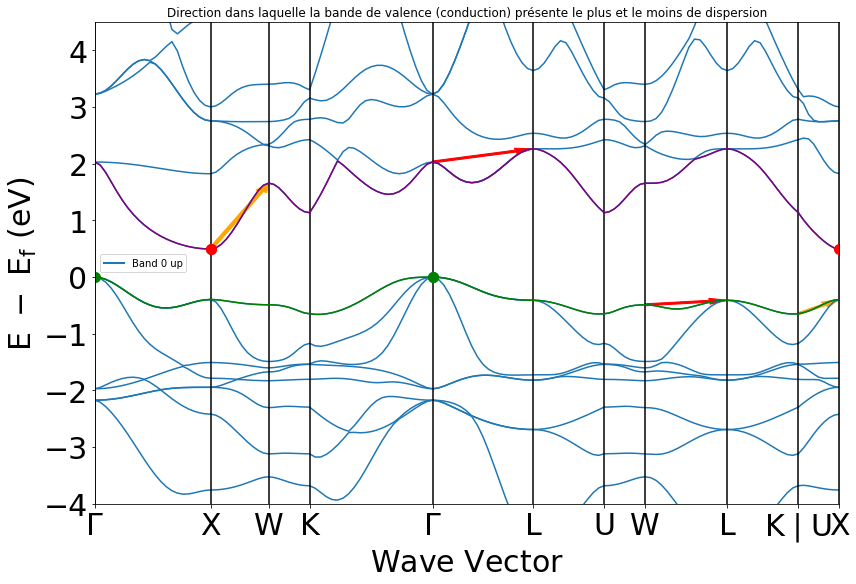

In [100]:
def pente(a,b) : 
    pente = abs(b[-1]-b[0])/(a[-1]-a[0])
    return np.array([pente,a[0],b[0],a[-1]-a[0],b[-1]-b[0]])
d = len(distances)
pentes_bv = np.zeros((len(distances), 5))
pentes_bc = np.zeros((len(distances), 5))

#On calcul les valeurs des pentes/indices minimales et maximales 
imax = 0
imin = 0
pente_minC = 0
pente_maxC = 0
for i in range(len(distances)) : 
    pentes_bc[i] = pente(distances[i],energy["1"][i][21]) #16 est le numéro de la première bande de conduction 
    if i == 0: 
        pente_minC = pente(distances[i],energy["1"][i][21])[0] 
        pente_maxC = pente(distances[i],energy["1"][i][21])[0] 
    else :
        if (pente_minC > pentes_bc[i][0]) :
            pente_minC = pentes_bc[i][0] 
            imin= i
        if pente_maxC < pentes_bc[i][0]  :
            pente_maxC = pentes_bc[i][0] 
            imax = i
pentes_bc = pentes_bc.T

plotter.get_plot()


#On calcul les valeurs des pentes/indices minimales et maximales 
pente_min = 0
pente_max = 0
Imax = 0
Imin = 0
for i in range(len(distances)) : 
    pentes_bv[i] = pente(distances[i],energy["1"][i][20]) #20 est le numéro de la dernière bande de valence
    if i == 0: 
        pente_min = pente(distances[i],energy["1"][i][20])[0] 
        pente_max = pente(distances[i],energy["1"][i][20])[0] 
    else :
        if (pente_min > pentes_bv[i][0]) :
            pente_min = pentes_bv[i][0] 
            Imin = i
        if pente_max < pentes_bv[i][0]  :
            pente_max = pentes_bv[i][0] 
            Imax = i
            
pentes_bv = pentes_bv.T

#On obtient la bande de valence maximum et la bande de conduction minimum
Vbm = data.get("vbm")
Cbm = data.get("cbm")
print("La bande de valence max est :", Vbm)
print("La bande de conduction min est :", Cbm)    
#On trace la première bande de conduction et la dernière bande de valence
for i in range(len(distances)):
    plt.plot(distances[i],energy['1'][i][20],'green')
    plt.plot(distances[i],energy['1'][i][21],'purple')
# On trace en rouge les points VBM et en vert les points CBM  
for i in range(len(Vbm)):
    x, y= Vbm[i]
    plt.plot(x, y, 'og', markersize=10)
for i in range(len(Cbm)):
    x, y = Cbm[i]
    plt.plot(x ,y ,'or',markersize=10)

#On place les flèches représentant les vecteurs de dispersion

plt.arrow(pentes_bc[1][imax], pentes_bc[2][imax], pentes_bc[3][imax], pentes_bc[4][imax], color='orange', width=0.035, length_includes_head=True)
plt.arrow(pentes_bc[1][imin], pentes_bc[2][imin], pentes_bc[3][imin], pentes_bc[4][imin], color='red', width=0.035, length_includes_head=True)

plt.arrow(pentes_bv[1][Imax], pentes_valence[2][Imax], pentes_valence[3][Imax], pentes_valence[4][Imax], color='orange', width=0.035, length_includes_head=True)
plt.arrow(pentes_bv[1][Imin], pentes_bv[2][Imin], pentes_bv[3][Imin], pentes_bv[4][Imin], color='red', width=0.035, length_includes_head=True)

plt.title('Direction dans laquelle la bande de valence (conduction) présente le plus et le moins de dispersion')

# Calcul de la masse effective

In [101]:
#On va d'abord chercher la masse effective de la bande de valence
h_planck = 6.582119570 * 1e-16 #eVs

bande_valence= structure_band.get_vbm()
kpoint_bv = bande_valence.get('kpoint').frac_coords
k = np.linalg.norm(kpoint_bv)

print('La norme est donné par : ' + str(k))
#On prends un vecteur du reseau de base pour pouvoir calculer G
a = 6.12
G = 2*np.pi/a
energy_bv = bande_valence['energy']
#En appliquant la formule du cours on trouve la mase effective
masse_effective_bv = h_planck**2*G**2/(2*energy_bv)
print('La masse effective du sommet de la dernière bande de valence est ' + str(masse_effective_bv) + ' kg')

La norme est donné par : 0.0
La masse effective du sommet de la dernière bande de valence est 3.517332055765101e-32 kg


In [102]:
#On calcule maintenant la masse effectibe de la bande de conduction
bande_conduction= structure_band.get_cbm()
# Vecteur d'onde associé en coordonnées factionnelles
kpoint_bc = bande_conduction.get('kpoint').frac_coords
k_bc = np.linalg.norm(kpoint_bc)

print('La norme est donné par : ' + str(k_bc))
energy_bc = bande_conduction['energy']

#En appliquant la formule du cours on trouve la mase effective
masse_effective_bc = h_planck**2*k_bc**2/(2*energy_bc)

print('La masse effective de la base de la première bande de conduction est ' + str(masse_effective_bc) + ' kg')

La norme est donné par : 0.7071067811865476
La masse effective de la base de la première bande de conduction est 1.5502196296508054e-32 kg
